# Facial Expression Recognition (Emotion Detection)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
## Dataset : [FER-2013](https://www.kaggle.com/msambare/fer2013)
![fer2013](https://miro.medium.com/max/602/1*slyZ64ftG12VU4VTEmSfBQ.png)

In [2]:
train_path = 'train'
val_path = 'test'

In [3]:
import matplotlib.pyplot as plt
import os
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
    
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 

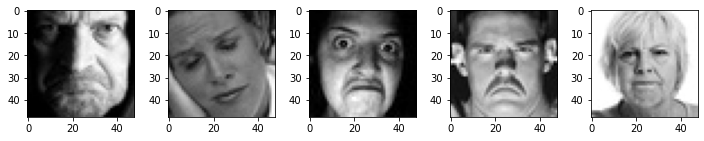

In [4]:
plot_images(train_path+'/angry')

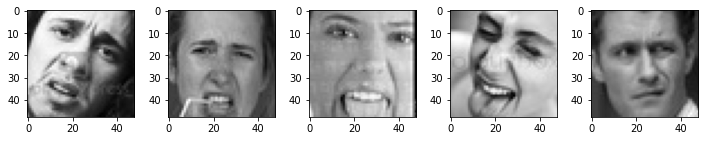

In [5]:
plot_images(train_path+'/disgust')

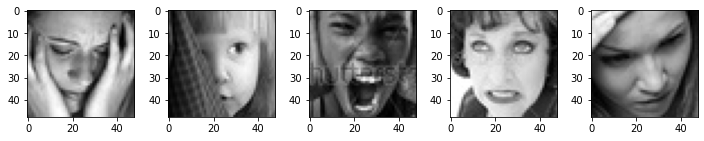

In [6]:
plot_images(train_path+'/fear')

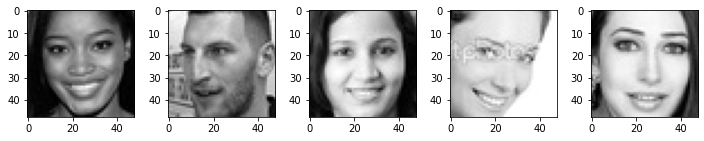

In [7]:
plot_images(train_path+'/happy')

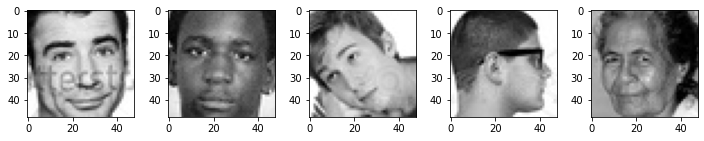

In [31]:
plot_images(train_path+'/neutral')

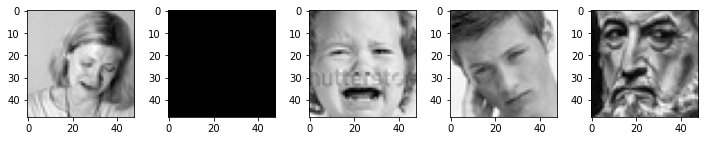

In [32]:
plot_images(train_path+'/sad')

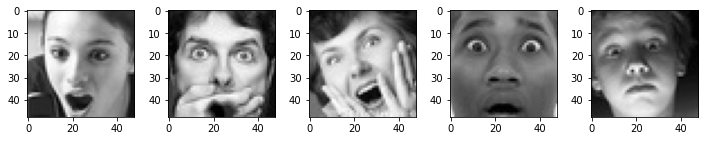

In [33]:
plot_images(train_path+'/surprise')

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import models, layers, regularizers

In [35]:
emotion_labels = sorted(os.listdir(train_path))
print(emotion_labels)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


## Data Generator

In [116]:
batch_size = 64
target_size = (48,48)

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

val_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 14890 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Build Model

In [37]:
input_shape = (48,48,1) # img_rows, img_colums, color_channels
num_classes = 7

In [38]:
# Build Model
model = models.Sequential()

model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape)) #, data_format='channels_last', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 12, 12, 128)      

In [39]:
# Compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

## Train Model

In [118]:
num_epochs = 10
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VAL   = val_generator.n//val_generator.batch_size

In [41]:
# Train Model
history = model.fit(train_generator, steps_per_epoch=STEP_SIZE_TRAIN, epochs=num_epochs, verbose=1, validation_data=val_generator, validation_steps=STEP_SIZE_VAL)

Epoch 1/10
232/232 [==============================] - 274s 1s/step - loss: 1.8209 - accuracy: 0.2492 - val_loss: 1.8116 - val_accuracy: 0.2578
Epoch 2/10
232/232 [==============================] - 187s 805ms/step - loss: 1.7476 - accuracy: 0.2876 - val_loss: 1.6688 - val_accuracy: 0.3432
Epoch 3/10
232/232 [==============================] - 197s 851ms/step - loss: 1.5586 - accuracy: 0.3969 - val_loss: 1.4710 - val_accuracy: 0.4249
Epoch 4/10
232/232 [==============================] - 226s 972ms/step - loss: 1.4267 - accuracy: 0.4525 - val_loss: 1.3941 - val_accuracy: 0.4696
Epoch 5/10
232/232 [==============================] - 223s 960ms/step - loss: 1.2962 - accuracy: 0.5090 - val_loss: 1.3568 - val_accuracy: 0.4796
Epoch 6/10
232/232 [==============================] - 204s 880ms/step - loss: 1.1736 - accuracy: 0.5581 - val_loss: 1.3239 - val_accuracy: 0.4983
Epoch 7/10
232/232 [==============================] - 189s 814ms/step - loss: 1.0265 - accuracy: 0.6171 - val_loss: 1.3459 - va

## Save Model

In [42]:
# Save Model
models.save_model(model, 'test_fer2013_cnn.h5') 

## Evaluate Model

In [48]:
# Evaluate Model
score = model.evaluate_generator(val_generator, steps=STEP_SIZE_VAL) 
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  2.186192274093628
Test accuracy:  0.5103236436843872


## Show Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


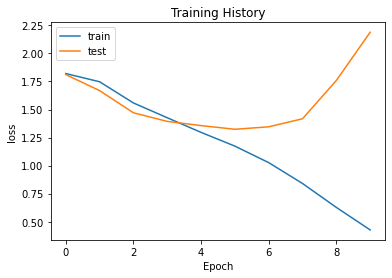

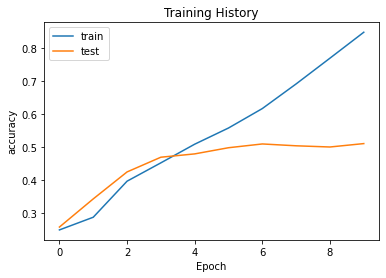

In [44]:
# Show Train History
keys=history.history.keys()
print(keys)

def show_train_history(hisData,train,test): 
    plt.plot(hisData.history[train])
    plt.plot(hisData.history[test])
    plt.title('Training History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

show_train_history(history, 'loss', 'val_loss')
show_train_history(history, 'accuracy', 'val_accuracy')